In [1]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU ,Bidirectional, CuDNNLSTM ,BatchNormalization ,Flatten, ConvLSTM1D
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer , LabelEncoder , StandardScaler
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import pyplot as plt
from sklearn.metrics import matthews_corrcoef
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1=pd.read_csv(r'/content/drive/MyDrive/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.csv',header=None)
df1=df1.drop([0])

<ipython-input-3-9a45bed40588>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv(r'/content/drive/MyDrive/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.csv',header=None)


In [4]:
df2=pd.read_csv(r'/content/drive/MyDrive/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.csv',header=None)
df2=df2.drop([0])

<ipython-input-4-8565aa0d52f1>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv(r'/content/drive/MyDrive/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.csv',header=None)


In [5]:
df3=pd.read_csv(r'/content/drive/MyDrive/MachineLearningCVE/Friday-WorkingHours-Morning.csv',header=None)
df3=df3.drop([0])

<ipython-input-5-7dd2e58ab6b7>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df3=pd.read_csv(r'/content/drive/MyDrive/MachineLearningCVE/Friday-WorkingHours-Morning.csv',header=None)


In [6]:
df4=pd.read_csv(r'/content/drive/MyDrive/MachineLearningCVE/Monday-WorkingHours.csv',header=None)
df4=df4.drop([0])

<ipython-input-6-8888de71f616>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df4=pd.read_csv(r'/content/drive/MyDrive/MachineLearningCVE/Monday-WorkingHours.csv',header=None)


In [7]:
df5=pd.read_csv(r'/content/drive/MyDrive/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.csv',header=None)
df5=df5.drop([0])

<ipython-input-7-42cb03717ea1>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df5=pd.read_csv(r'/content/drive/MyDrive/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.csv',header=None)


In [8]:
df6=pd.read_csv(r'/content/drive/MyDrive/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.csv',header=None)
df6=df6.drop([0])

<ipython-input-8-18b737e99211>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df6=pd.read_csv(r'/content/drive/MyDrive/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.csv',header=None)


In [9]:
df7=pd.read_csv(r'/content/drive/MyDrive/MachineLearningCVE/Tuesday-WorkingHours.csv',header=None)
df7=df7.drop([0])

<ipython-input-9-d67a65219662>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df7=pd.read_csv(r'/content/drive/MyDrive/MachineLearningCVE/Tuesday-WorkingHours.csv',header=None)


In [10]:
df8=pd.read_csv(r'/content/drive/MyDrive/MachineLearningCVE/Wednesday-workingHours.csv',header=None)
df8=df8.drop([0])

<ipython-input-10-95468b136b00>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df8=pd.read_csv(r'/content/drive/MyDrive/MachineLearningCVE/Wednesday-workingHours.csv',header=None)


In [11]:
df1[78].value_counts()

DDoS      128027
BENIGN     97718
Name: 78, dtype: int64

In [12]:
df2[78].value_counts()

PortScan    158930
BENIGN      127537
Name: 78, dtype: int64

In [13]:
df3[78].value_counts()

BENIGN    189067
Bot         1966
Name: 78, dtype: int64

In [14]:
df4[78].value_counts()

BENIGN    529918
Name: 78, dtype: int64

In [15]:
df5[78].value_counts()

BENIGN          288566
Infiltration        36
Name: 78, dtype: int64

In [16]:
df6[78].value_counts()

BENIGN                        168186
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Web Attack � Sql Injection        21
Name: 78, dtype: int64

In [17]:
df7[78].value_counts()

BENIGN         432074
FTP-Patator      7938
SSH-Patator      5897
Name: 78, dtype: int64

In [18]:
df8[78].value_counts()

BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name: 78, dtype: int64

In [19]:
df=pd.concat([df1,df2,df3,df5,df6,df7,df8],axis='rows')

In [20]:
df

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
1,54865,3,2,0,12,0,6,6,6,0,...,20,0,0,0,0,0,0,0,0,BENIGN
2,55054,109,1,1,6,6,6,6,6,0,...,20,0,0,0,0,0,0,0,0,BENIGN
3,55055,52,1,1,6,6,6,6,6,0,...,20,0,0,0,0,0,0,0,0,BENIGN
4,46236,34,1,1,6,6,6,6,6,0,...,20,0,0,0,0,0,0,0,0,BENIGN
5,54863,3,2,0,12,0,6,6,6,0,...,20,0,0,0,0,0,0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692699,53,32215,4,2,112,152,28,28,28.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,53,324,2,2,84,362,42,42,42.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692701,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692702,53,1048635,6,2,192,256,32,32,32.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [21]:
df[78].value_counts()

BENIGN                        1743179
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: 78, dtype: int64

In [22]:
label=LabelEncoder()
df[78]=label.fit_transform(df[78])

In [23]:
df[78].value_counts()

0     1743179
4      231073
10     158930
2      128027
3       10293
7        7938
11       5897
6        5796
5        5499
1        1966
12       1507
14        652
9          36
13         21
8          11
Name: 78, dtype: int64

In [24]:
df.shape

(2300825, 79)

In [25]:
df1=0;df2=0;df3=0;df5=0;df6=0;df7=0;df8=0

In [26]:
traindata,testdata=train_test_split(df,test_size=0.3,random_state=42)

In [27]:
traindata.shape

(1610577, 79)

In [28]:
testdata.shape

(690248, 79)

In [ ]:
df=0

In [30]:
for i in range(78):
    traindata[i]=traindata[i].astype(float)

In [31]:
for i in range(78):
  testdata[i]=testdata[i].astype(float)

In [32]:
traindata=traindata.dropna()
testdata=testdata.dropna()

In [33]:
testdata = testdata[np.all(np.isfinite(testdata), axis=1)]

In [34]:
traindata = traindata[np.all(np.isfinite(traindata), axis=1)]

In [ ]:
testdata[78].value_counts()

0     522708
4      69140
10     47569
2      38356
3       3031
7       2350
11      1739
6       1691
5       1653
1        582
12       494
14       193
9         11
8          5
13         4
Name: 78, dtype: int64

In [ ]:
traindata[78].value_counts()

0     853549
4     112485
10     77770
2      62989
3       5095
7       3807
11      2910
6       2880
5       2670
1        994
12       704
14       317
9         15
13        12
8          2
Name: 78, dtype: int64

In [35]:
traindata.shape

(1608869, 79)

In [36]:
X = traindata.iloc[:,0:78]
Y = traindata.iloc[:,78]
y = testdata.iloc[:,78]
x = testdata.iloc[:,0:78]

In [ ]:
triandata=0;testdata=0;valdata=0

In [37]:
scaler = StandardScaler().fit(X)
trainX = scaler.transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
#print(trainX[0:5,:])

scaler = StandardScaler().fit(x)
testX = scaler.transform(x)
# summarize transformed data
np.set_printoptions(precision=3)
#print(testT[0:5,:])

y_train = np.array(Y)
y_test = np.array(y)

In [ ]:
Tx=0;Ty=0;ttx=0;tty=0;vx=0;vy=0

In [41]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=25,svd_solver='full')
 
trainX_pca = pca.fit_transform(trainX)
testT_pca = pca.transform(testX)
 
explained_variance = pca.explained_variance_ratio_

In [42]:
explained_variance

array([0.219, 0.099, 0.083, 0.061, 0.047, 0.044, 0.041, 0.034, 0.033,
       0.029, 0.029, 0.028, 0.025, 0.024, 0.023, 0.018, 0.017, 0.016,
       0.015, 0.014, 0.013, 0.012, 0.012, 0.01 , 0.008])

In [43]:
np.sum(explained_variance)

0.9546275264294388

In [44]:
trainX_pca.shape

(1608869, 25)

In [ ]:
trainX=0;testX=0;valX=0

In [45]:
x_train=np.reshape(trainX_pca, (trainX_pca.shape[0], trainX_pca.shape[1],1))
x_test=np.reshape(testT_pca, (testT_pca.shape[0], testT_pca.shape[1],1))

In [ ]:
trainX=0;testX=0;valX=0

In [48]:
x_train.shape

(1608869, 25, 1)

In [49]:
model = Sequential()
model.add(Convolution1D(20, 5, padding="same",activation="tanh",input_shape=(25, 1)))
model.add(MaxPooling1D(pool_size=(2)))
model.add(LSTM(256,return_sequences=True,activation='relu'))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(64,activation='relu',return_sequences=True)))
model.add(GRU(128,activation='relu'))
model.add(Dense(15, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 25, 20)            120       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 12, 20)           0         
 1D)                                                             
                                                                 
 lstm_2 (LSTM)               (None, 12, 256)           283648    
                                                                 
 dropout_1 (Dropout)         (None, 12, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 12, 128)          164352    
 nal)                                                            
                                                                 
 gru_1 (GRU)                 (None, 128)              

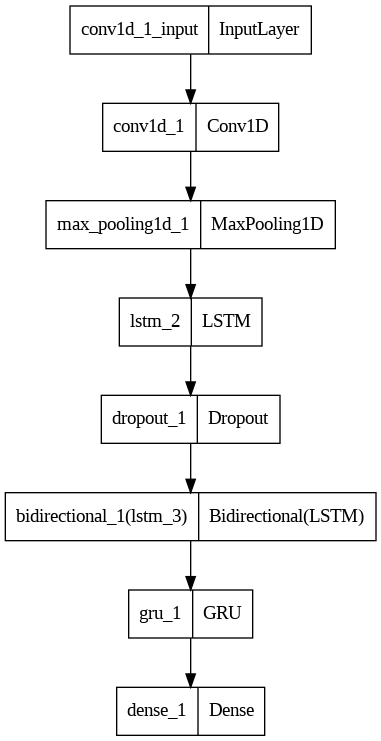

In [50]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png')

In [52]:
# try using different optimizers and different optimizer configs
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
checkpointer = callbacks.ModelCheckpoint(filepath="model.h5", verbose=1, save_best_only=True, monitor='val_accuracy',mode='max')
csv_logger = CSVLogger('training_set_iranalysis.csv',separator=',', append=False)
m=model.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=(x_test, y_test),callbacks=[checkpointer,csv_logger])

Epoch 1/20
6285/6285 [==============================] - ETA: 0s - loss: 0.0720 - accuracy: 0.9689
Epoch 1: val_accuracy improved from -inf to 0.96730, saving model to model.h5
6285/6285 [==============================] - 862s 136ms/step - loss: 0.0720 - accuracy: 0.9689 - val_loss: 0.0832 - val_accuracy: 0.9673
Epoch 2/20
6285/6285 [==============================] - ETA: 0s - loss: 0.0616 - accuracy: 0.9734
Epoch 2: val_accuracy improved from 0.96730 to 0.97553, saving model to model.h5
6285/6285 [==============================] - 732s 117ms/step - loss: 0.0616 - accuracy: 0.9734 - val_loss: 0.0556 - val_accuracy: 0.9755
Epoch 3/20
6285/6285 [==============================] - ETA: 0s - loss: 0.0556 - accuracy: 0.9763
Epoch 3: val_accuracy did not improve from 0.97553
6285/6285 [==============================] - 698s 111ms/step - loss: 0.0556 - accuracy: 0.9763 - val_loss: 0.0588 - val_accuracy: 0.9736
Epoch 4/20
6285/6285 [==============================] - ETA: 0s - loss: 0.0526 - accu

In [53]:
model.load_weights('model.h5')

In [55]:
loss, accuracy = model.evaluate(x_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

21548/21548 [==============================] - 296s 14ms/step - loss: 0.0564 - accuracy: 0.9782

Loss: 0.06, Accuracy: 97.82%


In [56]:
y_pred=model.predict(x_test)
classes_x=np.argmax(y_pred,axis=1)

21548/21548 [==============================] - 310s 14ms/step


In [58]:
recall = recall_score(y_test, classes_x, average="weighted")
precision = precision_score(y_test, classes_x , average="weighted")
f1 = f1_score(y_test, classes_x, average="weighted")
print(accuracy,recall,precision,f1)

0.9782488346099854 0.9782488260051108 0.9782104923199616 0.9777538566807804


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,classes_x))

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99    522708
           1       0.99      0.37      0.54       582
           2       1.00      1.00      1.00     38356
           3       0.98      0.95      0.97      3031
           4       0.99      0.93      0.96     69140
           5       0.86      0.98      0.92      1653
           6       0.97      0.97      0.97      1691
           7       1.00      0.99      0.99      2350
           8       1.00      0.60      0.75         5
           9       0.00      0.00      0.00        11
          10       0.90      0.95      0.92     47569
          11       0.96      0.96      0.96      1739
          12       0.74      0.05      0.10       494
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00       193

    accuracy                           0.98    689526
   macro avg       0.76      0.65      0.67    689526
weighted avg       0.98   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


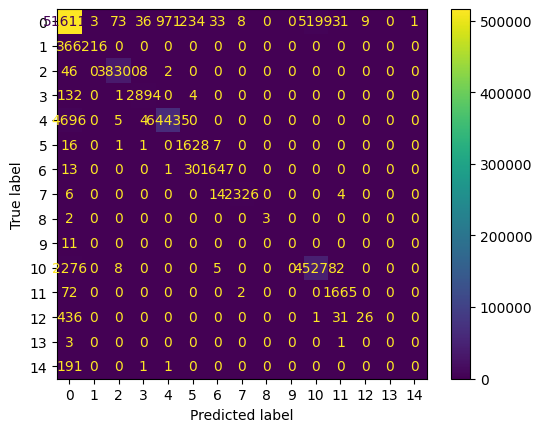

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=metrics.confusion_matrix(y_test,classes_x)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()